In [1]:
### PART 1 ###
import pytesseract
from PIL import Image
from io import StringIO
import pandas as pd
import re
import numpy as np

In [122]:
color_image = Image.open('/Users/tommylee/Desktop/STA 160/SampleCatalogPages/UCD_Lehmann_0069_new.jpg')
bw2 = pytesseract.image_to_data(color_image,output_type='DICT')

#Lines below make string into dataframe. 
image_bind = StringIO(bw2) 
df = pd.read_csv(image_bind, sep="\t",quoting=3) #Quoting = 3 fixes "Parse error." More for picture issues.
df = df.dropna().reset_index()
df.to_csv('file2.csv')
df

,index,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,4,5,1,1,1,1,1,0,498,2496,763,95,
1,8,5,1,2,1,1,1,39,3456,61,96,56,Ml
2,10,5,1,2,1,2,1,0,3503,88,133,49,lite
3,12,5,1,2,1,3,1,0,3622,91,109,57,M75“
4,16,5,1,3,1,1,1,202,1356,68,28,87,The
5,17,5,1,3,1,1,2,285,1353,194,39,83,popularity
6,18,5,1,3,1,1,3,494,1351,39,30,88,of
7,19,5,1,3,1,1,4,545,1352,56,28,86,the
8,20,5,1,3,1,1,5,616,1351,64,29,89,Vin
9,21,5,1,3,1,1,6,695,1351,88,29,78,Rose’


In [110]:
left = df.loc[df['text'] == 'Bottle', 'left']  #Check for left coordinate of the word 'Bottle'
left_top = df.loc[df['text'] == 'Bottle', 'top'] #Check for width of the word ' Bottle'

left_top

79     1623
265    2729
573    1625
790    2726
Name: top, dtype: int64

In [185]:
left = df.loc[df['text'] == 'Bottle', 'left']  #Check for left coordinate of the word 'Bottle'
left_width = df.loc[df['text'] == 'Bottle', 'width'] #Check for width of the word ' Bottle'


#top = []
#for i in range(len(left)):
    #if left.values[i+1]-left.values[i] < 50:
        #top.append(df['top'][left.index[i]])


# Using the word 'Bottle', we make the left and right boundaries to extract anything 
# within them including bottle price and text.
boundaries = [(bound -40 < df['left']) & (df['left'] < bound + bound_width) 
           for bound,bound_width in zip(left,left_width)]

# Index of words/prices that are within the boundaries from the original dataframe.
locator = [np.where(boundaries[index]) 
           for index in range(len(boundaries))] 

# Make nested list of array into nested lists of list.
flat_array = [locator[list_index][0].tolist() 
              for list_index in range(len(locator))] 

#Flattens the nested lists of list into one list.
flat_list = [item for sublist in flat_array 
             for item in sublist]


flat_list = list(set(flat_list))


# Extract only bottle prices using regular expression. 
bottle_price = []
bottle_left = []
bottle_top = []
for i in range(len(flat_list)):
    if re.match("^\d+?\.\d+?$", df['text'][flat_list[i]]) is None and df['text'][flat_list[i]].count('.') <= 2:
        pass
    else:
        bottle_price.append(df['text'][flat_list[i]])
        bottle_left.append(df['left'][flat_list[i]])
        bottle_top.append(df['top'][flat_list[i]])

bottle_top
        

[3617,
 3544,
 1679,
 1690,
 1801,
 1857,
 2013,
 2048,
 2826,
 2780,
 3008,
 2985,
 3191,
 3125,
 3402,
 3331]

In [121]:
left2 = []
left_width2 = []
for i in range(len(df['text'])):
    if df['text'][i] == 'Case':
        left2.append(df['left'][i])
        left_width2.append(df['width'][i])

bounded2 = []
for j in range(len(left)):
    for k in range(len(df)):
        if  left2[j]-80< df['left'][k] < left2[j]+ left_width2[j]+80:
            bounded2.append(k)
bounded2 = list(set(bounded2)) 

case_price = []
for i in range(len(bounded2)):
    if re.match("^\d+?\.\d+?$", df['text'][bounded2[i]]) is None and df['text'][bounded2[i]].count('.') < 2 or "$" in df['text'][bounded2[i]] :
        pass
    else:
        case_price.append(df['text'][bounded2[i]])
case_price



['23.65',
 '107.45',
 '24.75',
 '16.10',
 '30.15',
 '16.10',
 '30.15',
 '16.10',
 '15.00',
 '24.75',
 '19.35',
 '30.15',
 '21.50',
 '32.30',
 '89.50']

In [191]:
left3 = []
left_width3 = []
height = []
for i in range(len(df['text'])):
    if df['text'][i] == 'No.':
        left3.append(df['left'][i])
        left_width3.append(df['width'][i])
        height.append(df['height'][i])

bounded3 = []
for j in range(len(left)):
    for k in range(len(df)):
        if  left3[j]-40 < df['left'][k] < left3[j]+ left_width3[j]:
            bounded3.append(k)


no = []
no_left = [] 
no_width = []
no_top = [] 
for i in range(len(bounded3)):
    if df['text'][bounded3[i]].isdigit() and  1000 > int(df['text'][bounded3[i]]) > 100:
        no.append(df['text'][bounded3[i]])
        no_left.append(df['left'][bounded3[i]])
        no_width.append(df['width'][bounded3[i]])
        no_top.append(df['top'][bounded3[i]])
        
no = list(set(no))
no_top = list(set(no_top))
no_left = list(set(no_top))
no_right = []
for i in range(len(no_left)):
    no_right.append(no_left[i] + no_width[i])

no_width

[57,
 56,
 56,
 55,
 55,
 54,
 56,
 51,
 57,
 56,
 56,
 55,
 55,
 54,
 56,
 51,
 58,
 57,
 58,
 56,
 57,
 57,
 58,
 57,
 58,
 57,
 58,
 56,
 57,
 57,
 58,
 57]

In [180]:
test = [] 
for j in range(len(no_right)):
    for i in range(len(df['left'])):
        if bottle_top[j] - 20 < no_top[j] < bottle_top[j]: #Check if number ID and bottle price are on the same line.
            if no_right[j] < df['left'][i] < bottle_left[j] and bottle_top[j] - 15 < df['top'][i] < bottle_top[j] + 15:
                test.append(df['text'][i])
        elif no_right[j] < df['left'][i] < bottle_left[j] and no_top[j]- 30 < df['top'][i] < bottle_top[j] +30:
                test.append(df['text'][i])
    
test
              

['One',
 "\\‘UllnL'",
 'and',
 '1917,',
 '.it',
 'whttt',
 '.',
 '7.95',
 'llttttt',
 'Wllllcx.',
 'tn',
 'tlurtnt:',
 'Wine',
 'we']

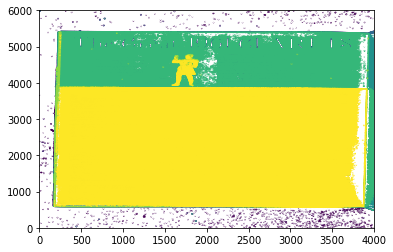

In [29]:
from pylab import *
bw = color_image.convert('L')
bw1 = color_image.convert('1', dither=Image.NONE)   #Better for white background 
contour(bw, origin='image')

In [ ]:
### PART 2 ###
items = os.listdir("/Users/tommylee/Desktop/STA 160/SampleCatalogPages")
#items = items[20:30]
#items

In [ ]:
import numpy as np
import pandas as pd
names = pd.DataFrame(np.array(items).reshape(len(items),1),columns = ['Name'])
#names

In [ ]:
def image_ident():
    identify = [] 
    for i in items:
        color_image = Image.open('/Users/tommylee/Desktop/STA 160/SampleCatalogPages/'+i)
        bw1 = color_image.convert('1', dither=Image.NONE)
        if "No." in pytesseract.image_to_string(bw1):
            identify.append(True)
        elif "Bottle" in pytesseract.image_to_string(bw1):
            identify.append(True) 
        elif "bottle" in pytesseract.image_to_string(bw1):
            identify.append(True)
        elif "case" in pytesseract.image_to_string(bw1):
            identify.append(True)
        else:
            identify.append(False)
    return identify
image_ident()

In [164]:
### PART 3 ###
from pytesseract import pytesseract
from bs4 import UnicodeDammit, BeautifulSoup
#Changes to HOCR 
a = pytesseract.run_tesseract('/Users/tommylee/Desktop/STA 160/SampleCatalogPages/UCD_Lehmann_0208.jpg','output', lang=None, extension = 'hocr',config="hocr")


In [165]:
#HOCR to pdf
with open('output.hocr', 'rb') as stream:
     content = stream.read()
        
from xhtml2pdf import pisa

outputFilename = "test.pdf"
resultFile = open(outputFilename, "w+b")

pisaStatus = pisa.CreatePDF(content, dest= resultFile) 
resultFile.close() 

In [171]:
#PDF to text as a list
import PyPDF2
pdfFileObj = open('test.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pageObj = pdfReader.getPage(0)
b = pageObj.extractText().splitlines()

#Finds wine prices based on if text contains numbers.
d = []
for i in range(len(b)):
    if any(str.isdigit(c) for c in b[i]) == True:
        d.append(b[i])
    else:
        pass

#Finds wine prices based on texts with a certain number of digits.
e = []
for j in range(len(d)):
    if sum(c.isdigit() for c in d[j])>=9:
        e.append(d[j])
    else:
        pass
e
        


['‚ _ . . 1 er Italy. of 24 different half 9. n ‚0 Wmﬁ cousmmmo TAWNY . 32.20',
 "SSORTMENT OF SANDEMAN ONE STAR RUBY . 34.56 T1113, 48t $59 cocxaunu N0. 25 , . 35.10 cos 5 ' v mm :5055235020' : 22:: ng adventure in (‚om- .",
 '. . A . , . HARVEY™S HUNTING . 40.05 "0 ﬁxl"3r\'°"ﬁc» ﬂ"5 \' . . . \' SANDEMAN PARTNER™S , ............................................... . 51.00 ferent half bottles is . . \' , .. .']

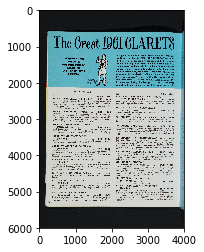

In [18]:
### PART 4 ###
import matplotlib.pyplot as plt
import numpy as np

img = np.array(plt.imread('/Users/tommylee/Desktop/STA 160/SampleCatalogPages/UCD_Lehmann_0011.jpg'))
plt.imshow(img)

(array([1.3463560e+06, 5.8937300e+05, 1.4832160e+06, 1.1769458e+07,
        4.4515280e+06, 5.7570900e+05, 4.7868100e+05, 4.2836700e+05,
        4.3134300e+05, 3.0602800e+05, 2.5604700e+05, 2.2356700e+05,
        3.9191300e+05, 9.2053500e+05, 1.6813520e+06, 1.5279320e+06,
        7.8230100e+05, 2.4536300e+05, 2.0627800e+05, 2.2613900e+05,
        2.3613000e+05, 1.9666700e+05, 1.9664800e+05, 1.9864700e+05,
        2.2883000e+05, 2.2607900e+05, 3.3705000e+05, 9.4389400e+05,
        3.5487480e+06, 1.4976480e+06, 2.0440710e+06, 2.7497900e+06,
        5.3129290e+06, 1.9656418e+07, 5.9879430e+06, 3.1574600e+05,
        1.2760000e+03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]),
 array([  0.  ,   6.25,  12.5 ,  18.75,  25.  ,  31.25,  37.5 ,  43.75,
         50.  ,  56.25,  62.5 ,  68.75,  75.  ,  81.25,  87.5 ,  93.75,
        100.  , 106.25, 112.5 , 118.75, 125.  , 131.25, 137.5 , 143.75,
        150.  , 156.25, 162.5 , 168.75, 175.  , 181.25, 187.5 , 193.75,
        200.  , 206.25, 212.5 

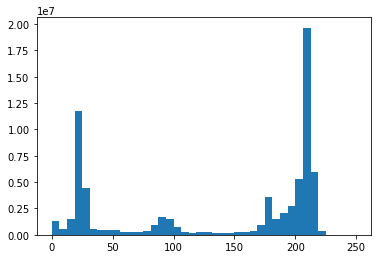

In [28]:
plt.hist(img.flat,bins =40, range = (0,250))

In [68]:
### PART 5 ###
from PIL import Image
col = Image.open('/Users/tommylee/Desktop/STA 160/SampleCatalogPages/UCD_Lehmann_0011.jpg') #read image
bw = col.convert('1',dither=Image.NONE)
#bw = bw.point(lambda x: 0 if x<128 else 255, '1')


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

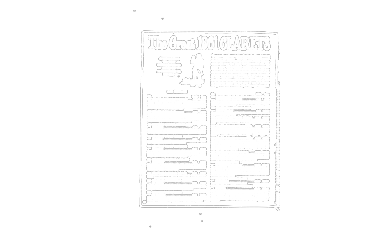

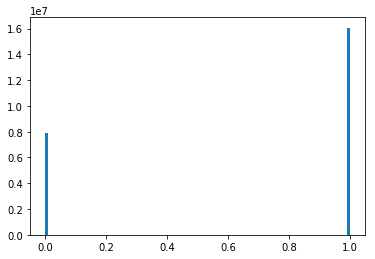

In [34]:
from pylab import *

# create a new figure
figure()
gray()
# show contours with origin upper left corner
contour(bw, origin='image')
axis('equal')
axis('off')


figure()


hist(np.array(bw).flatten(), 128)

show()